## 🕶 Pokemon Visualization with Matplotlib


Still in Progress...

### [TODO]

1. Radarplot (+compare)
2. Ridgeplot
3. Scatterplot 


In [1]:
!pip install seaborn==0.11

     |████████████████████████████████| 283 kB 2.8 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
pokemon = pd.read_csv('/kaggle/input/pokemon/Pokemon.csv')
pokemon_list = pd.read_csv('/kaggle/input/pokemon-images-and-types/pokemon.csv')

In [4]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


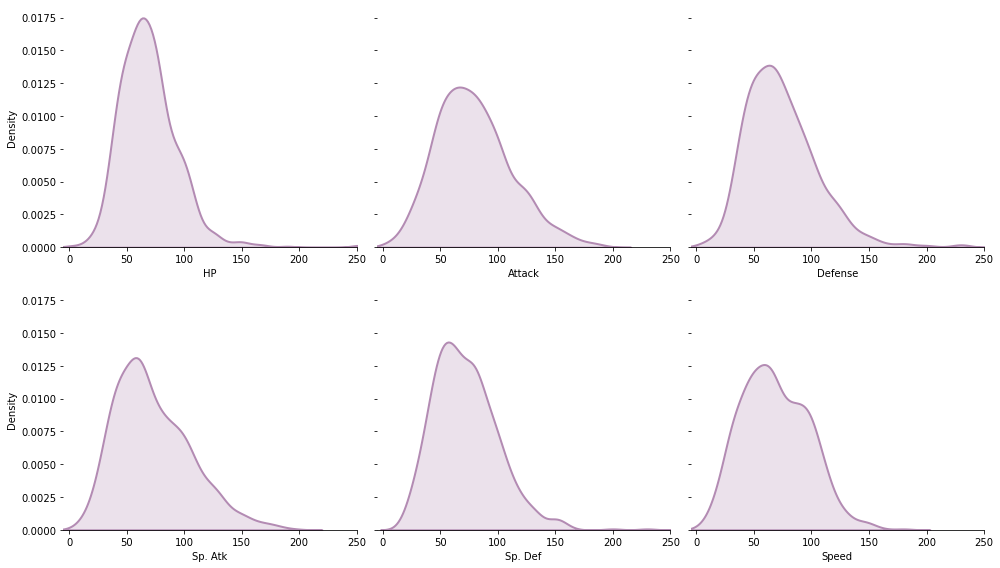

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(14, 8), sharey=True)

spines = ["top","right","left"]
for i, col in enumerate(["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]):
    sns.kdeplot(x=col, data=pokemon, label=col, ax=ax[i//3][i%3],
                fill=True, color='#B38BB3', linewidth=2
               )
    
    ax[i//3][i%3].set_xlim(-5, 250)
    
    for s in spines:
        ax[i//3][i%3].spines[s].set_visible(False)
        

plt.tight_layout()
plt.show()

['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark', 'Steel', 'Flying']


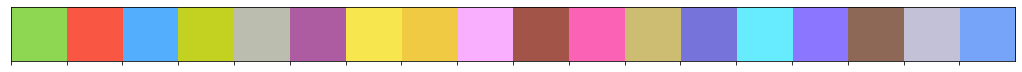

In [7]:
type1 = list(pokemon['Type 1'].unique())


type_color = [
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"
]


pokemon['t1_color'] = pokemon['Type 1'].apply(lambda x : type_color[type1.index(x)])


sns.palplot(type_color)
print(type1)

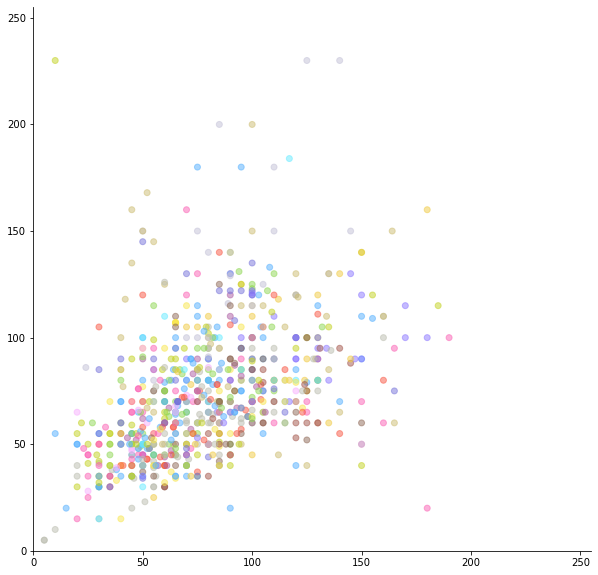

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.scatter(pokemon['Attack'], y=pokemon['Defense'], color=pokemon['t1_color'], alpha=0.5)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
    
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
plt.show()

In [9]:

def pokemon_stat(pokemon_id, data, img_list):
    stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
    pokemon_idx = data['#'].to_list().index(pokemon_id)
    values = data.iloc[pokemon_idx][stats].to_list()
    color = data.iloc[pokemon_idx]['t1_color']
    
    values += values[:1]
    angles = [ np.deg2rad((90+n*60)%360) for n in range(6)]
    angles += angles[:1]

    # figure
    fig = plt.figure(figsize=(14, 7))
    # img
    ax_img = plt.subplot(121)
    name = img_list.iloc[pokemon_id-1]['Name']
    img_path = f'/kaggle/input/pokemon-images-and-types/images/images/{name}.png'
    img = mpl.image.imread(img_path)
    ax_img.imshow(img, extent=(10, 90, 30, 110))
    ax_img.set_xlim(0, 100)
    ax_img.set_ylim(0, 100)
    ax_img.set_xticks([])
    ax_img.set_yticks([])
    ax_img.text(50, 30, name, color='white', ha='center', fontweight='bold', fontsize=15,
        bbox=dict(facecolor=color, edgecolor=color, boxstyle='round,pad=1'))
    
    for spine in ["left", "top", "right", "bottom"]:
        ax_img.spines[spine].set_visible(False)
    
    # radar chart
    ax = plt.subplot(122, polar=True) 
    ax.set_rlabel_position(0)
    ax.tick_params('x', pad=18)
    ax.set_thetagrids([(90+n*60)%360 for n in range(6)], stats,
                           fontweight='bold')

    ax.set_rgrids(range(50, 260, 50), range(50, 260, 50), color="gray", size=8)
    ax.set_ylim(0,260)

    ax.plot(angles, values, color= color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.5)

    plt.tight_layout()
    plt.show()

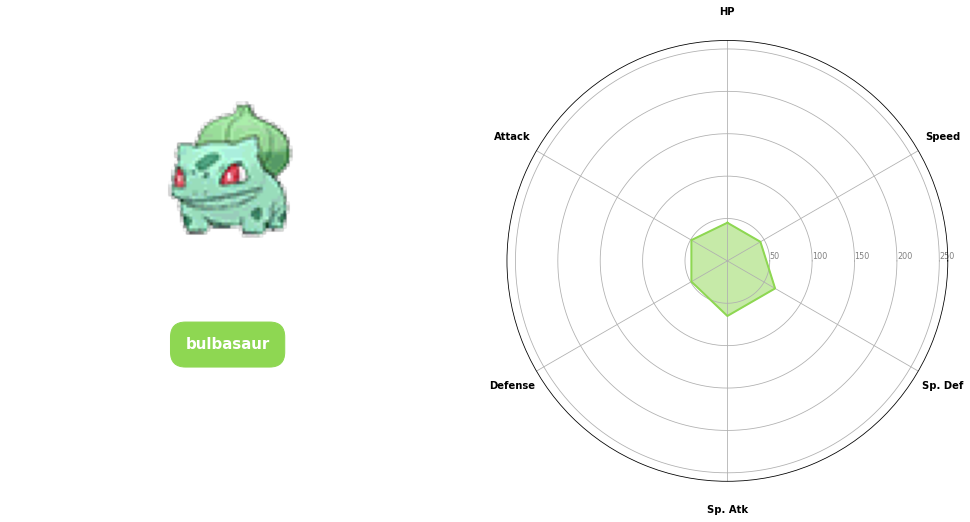

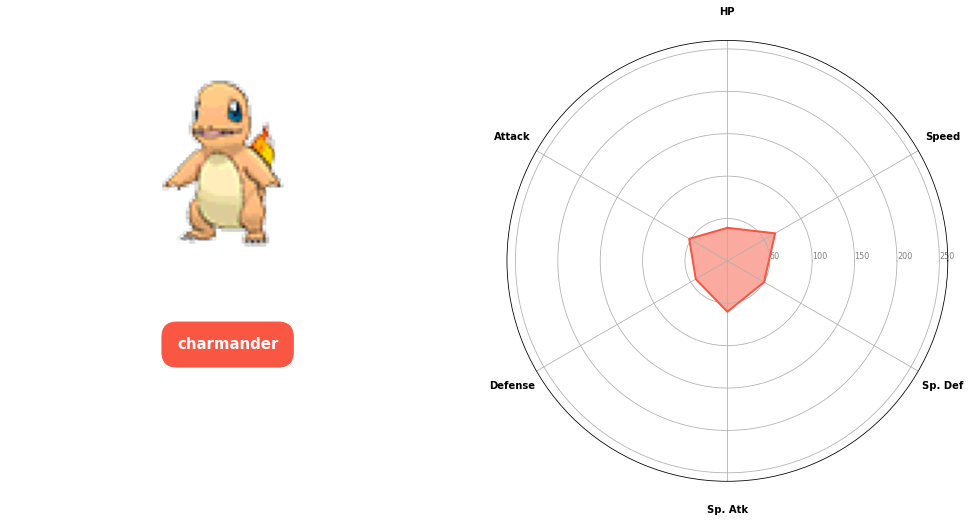

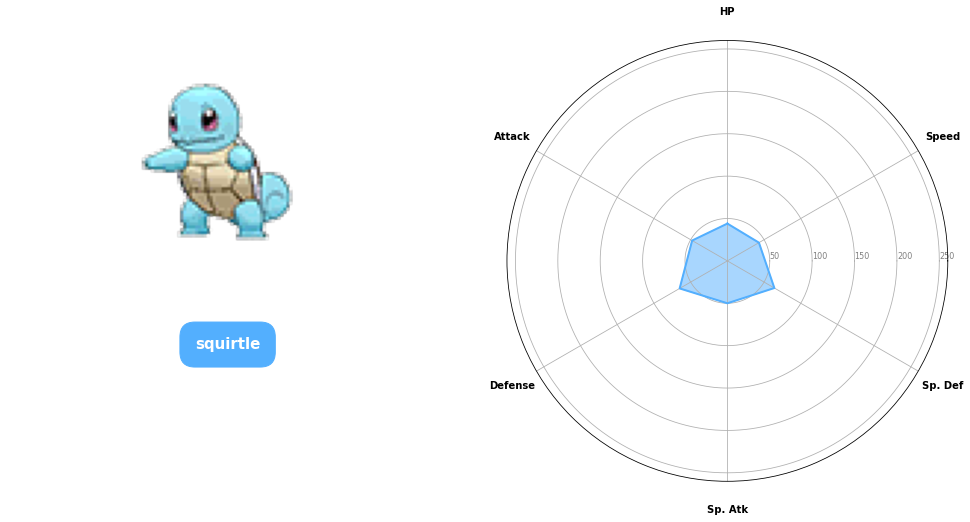

In [10]:
pokemon_stat(1, pokemon, pokemon_list)
pokemon_stat(4, pokemon, pokemon_list)
pokemon_stat(7, pokemon, pokemon_list)

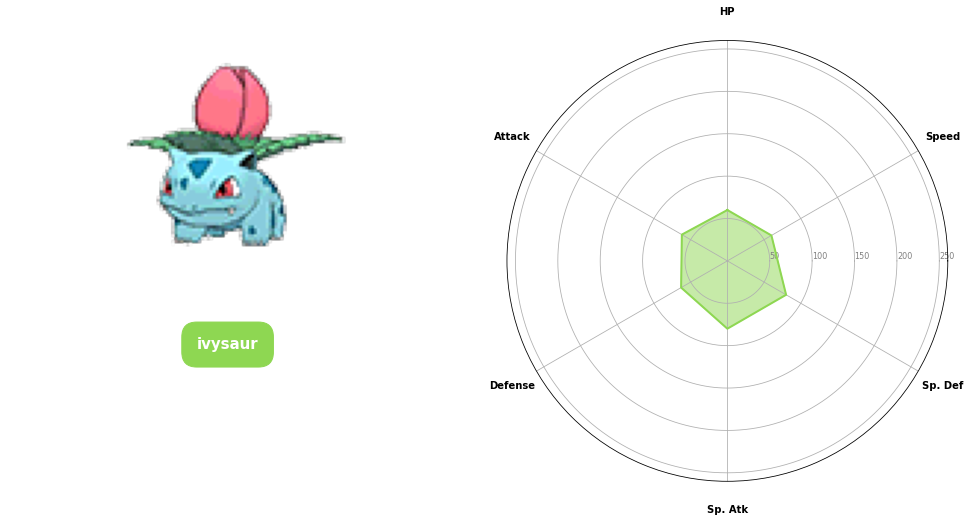

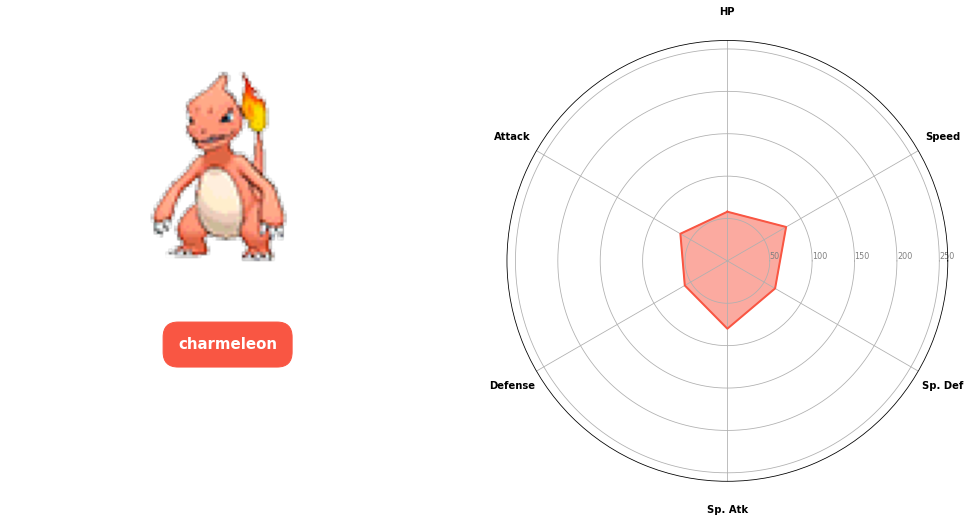

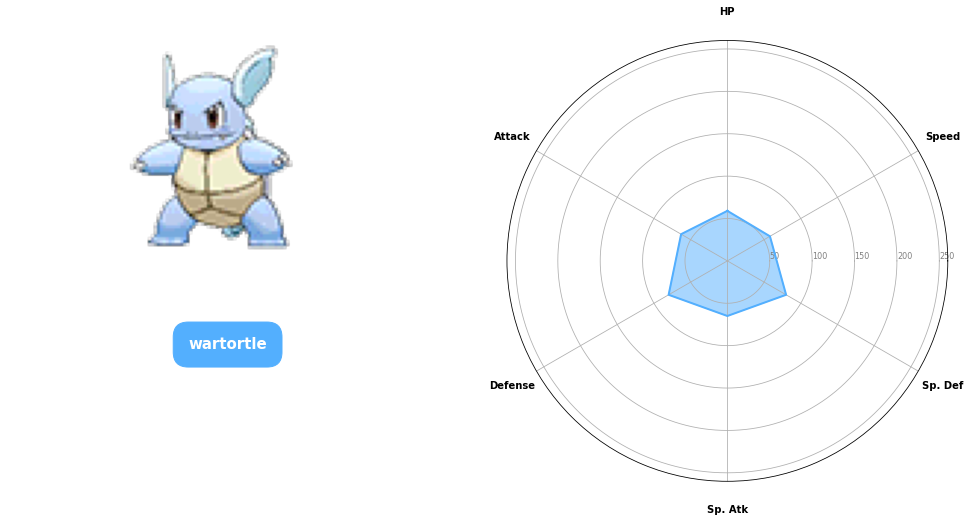

In [11]:
pokemon_stat(2, pokemon, pokemon_list)
pokemon_stat(5, pokemon, pokemon_list)
pokemon_stat(8, pokemon, pokemon_list)

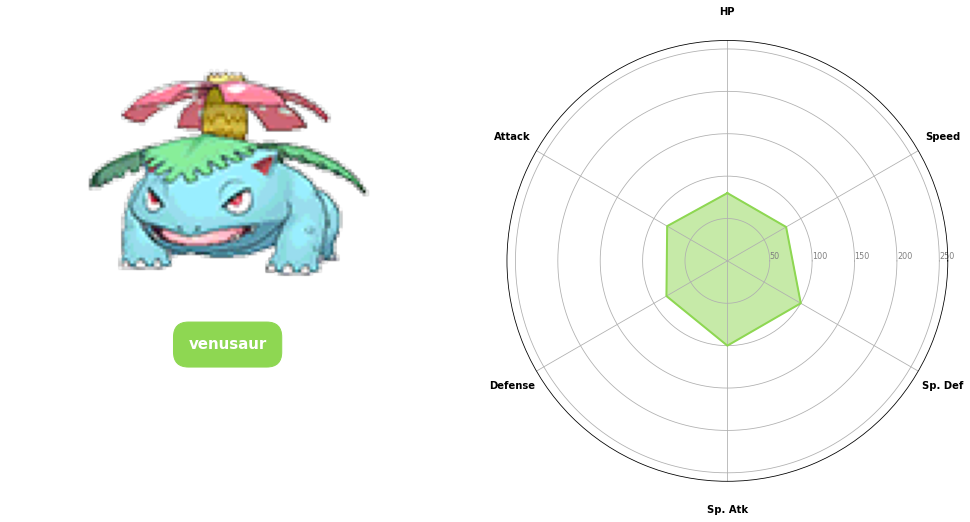

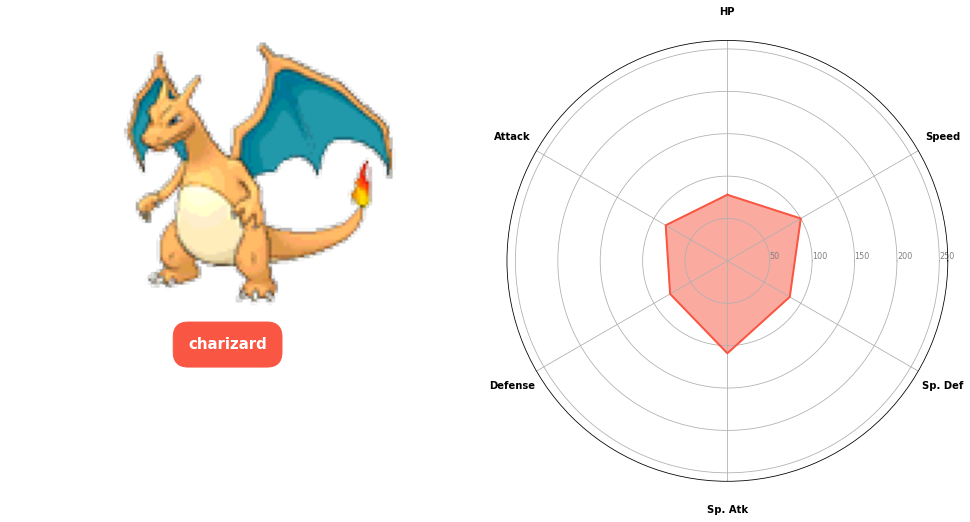

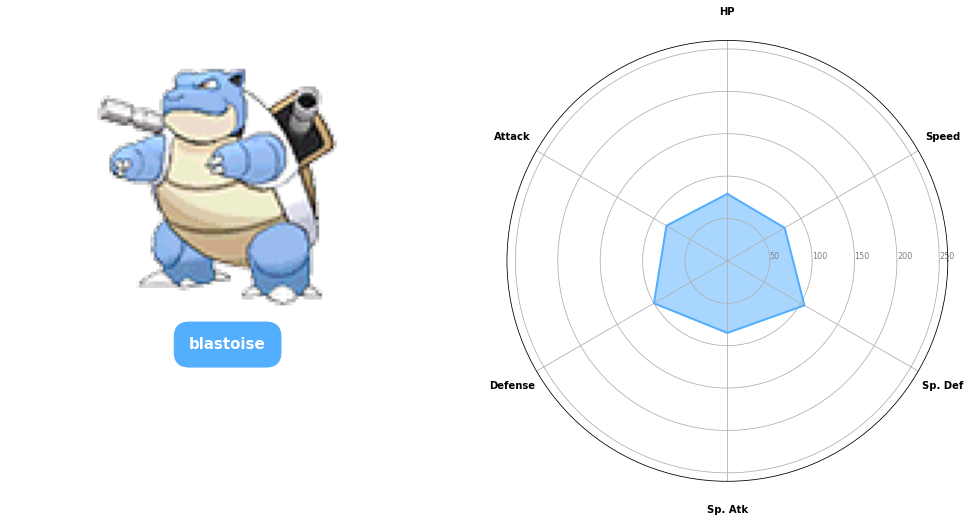

In [12]:
pokemon_stat(3, pokemon, pokemon_list)
pokemon_stat(6, pokemon, pokemon_list)
pokemon_stat(9, pokemon, pokemon_list)

In [13]:

def pokemon_stat_compare(pokemon_id1, pokemon_id2, data, img_list):
    stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
    pokemon_idx1 = data['#'].to_list().index(pokemon_id1)
    pokemon_idx2 = data['#'].to_list().index(pokemon_id2)
    
    values1 = data.iloc[pokemon_idx1][stats].to_list()
    values2 = data.iloc[pokemon_idx2][stats].to_list()
    color1 = data.iloc[pokemon_idx1]['t1_color']
    color2 = data.iloc[pokemon_idx2]['t1_color']
    
    values1 += values1[:1]
    values2 += values2[:1]
    angles = [ np.deg2rad((90+n*60)%360) for n in range(6)]
    angles += angles[:1]

    # figure
    fig = plt.figure(figsize=(21, 7))
    # img
    ax_img1 = plt.subplot(131)
    name1 = img_list.iloc[pokemon_id1-1]['Name']
    img_path = f'/kaggle/input/pokemon-images-and-types/images/images/{name1}.png'
    img = mpl.image.imread(img_path)
    ax_img1.imshow(img, extent=(10, 90, 30, 110))
    ax_img1.set_xlim(0, 100)
    ax_img1.set_ylim(0, 100)
    ax_img1.set_xticks([])
    ax_img1.set_yticks([])
    ax_img1.text(50, 30, name1, color='white', ha='center', fontweight='bold', fontsize=15,
        bbox=dict(facecolor=color1, edgecolor=color1, boxstyle='round,pad=1'))
    
    ax_img2 = plt.subplot(133)
    name2 = img_list.iloc[pokemon_id2-1]['Name']
    img_path = f'/kaggle/input/pokemon-images-and-types/images/images/{name2}.png'
    img = mpl.image.imread(img_path)
    ax_img2.imshow(img, extent=(10, 90, 30, 110))
    ax_img2.set_xlim(0, 100)
    ax_img2.set_ylim(0, 100)
    ax_img2.set_xticks([])
    ax_img2.set_yticks([])
    ax_img2.text(50, 30, name2, color='white', ha='center', fontweight='bold', fontsize=15,
        bbox=dict(facecolor=color2, edgecolor=color2, boxstyle='round,pad=1'))
    
    for spine in ["left", "top", "right", "bottom"]:
        ax_img1.spines[spine].set_visible(False)
        ax_img2.spines[spine].set_visible(False)
    
    # radar chart
    ax = plt.subplot(132, polar=True) 
    ax.set_rlabel_position(0)
    ax.tick_params('x', pad=18)
    ax.set_thetagrids([(90+n*60)%360 for n in range(6)], stats,
                           fontweight='bold')

    ax.set_rgrids(range(50, 260, 50), range(50, 260, 50), color="gray", size=8)
    ax.set_ylim(0,260)

    ax.plot(angles, values1, color= color1, linewidth=2, linestyle='solid')
    ax.fill(angles, values1, color=color1, alpha=0.5)
    ax.plot(angles, values2, color= color2, linewidth=2, linestyle='solid')
    ax.fill(angles, values2, color=color2, alpha=0.5)

    plt.tight_layout()
    plt.show()

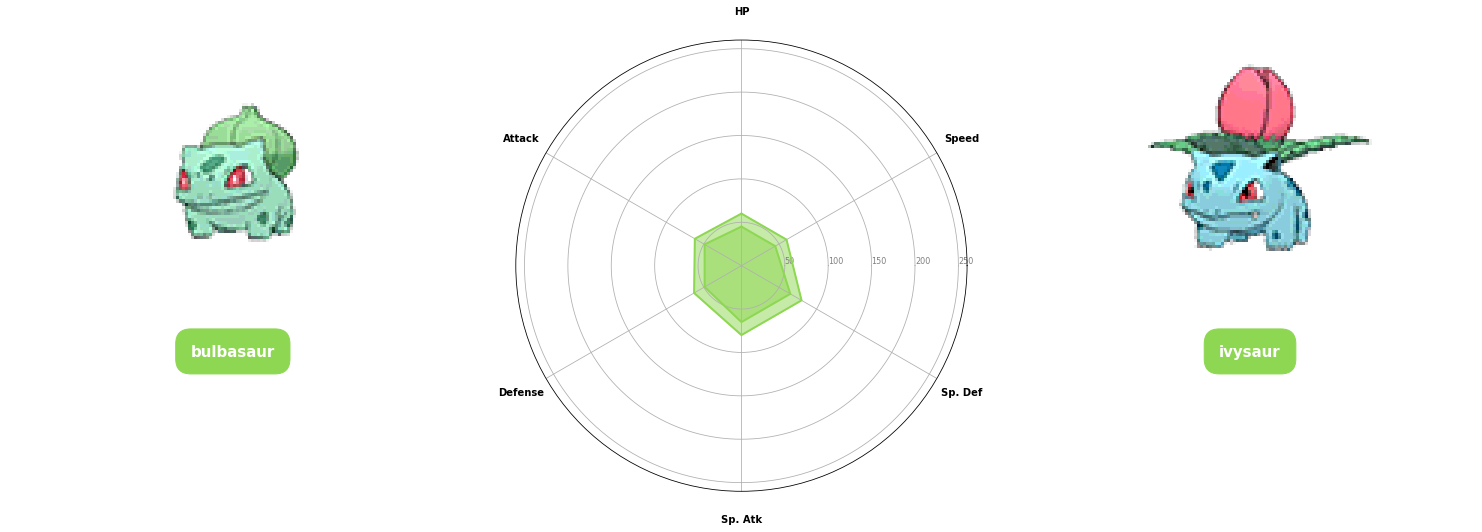

In [14]:
pokemon_stat_compare(1, 2, pokemon, pokemon_list)

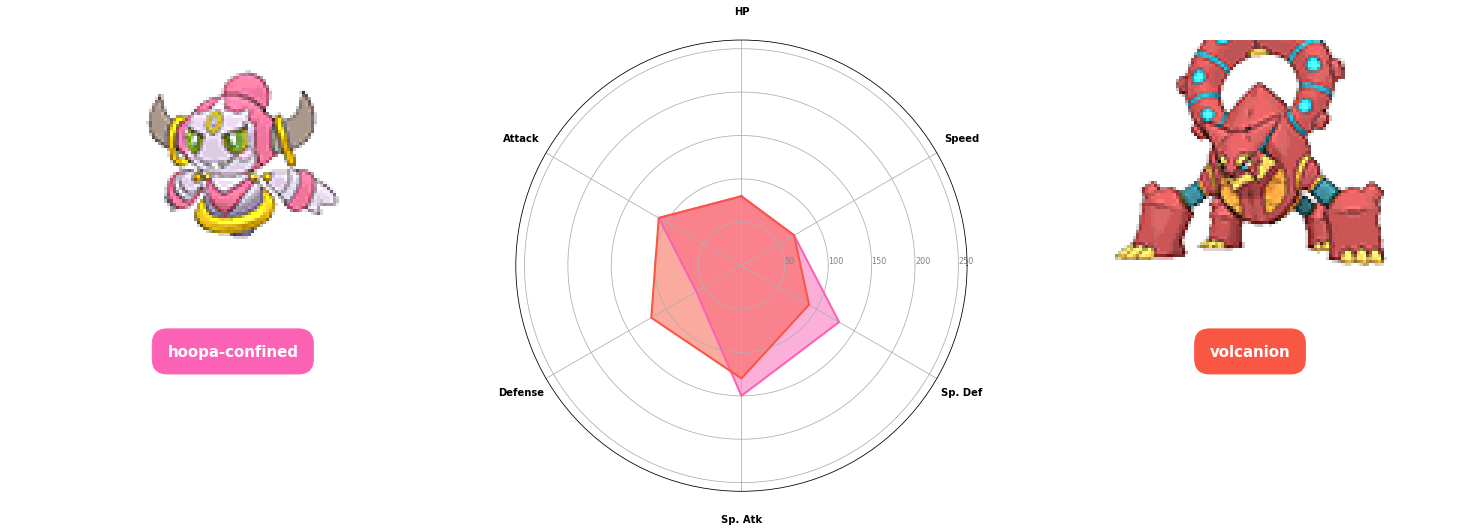

In [15]:
pokemon_stat_compare(720, 721, pokemon, pokemon_list)

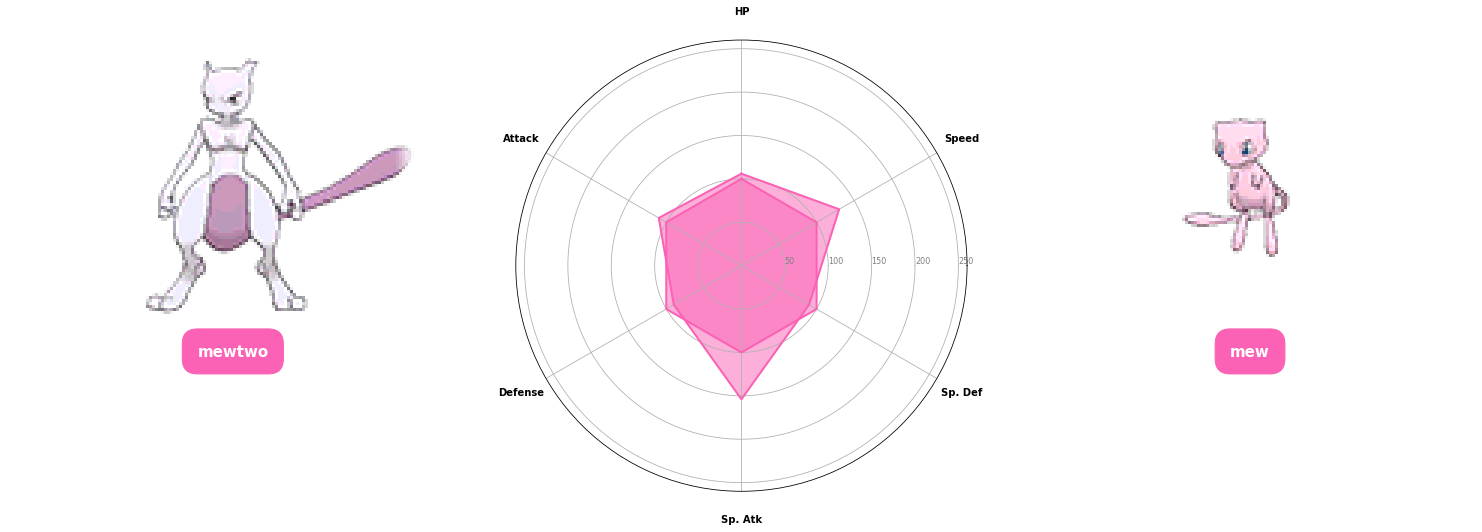

In [16]:
pokemon_stat_compare(150, 151, pokemon, pokemon_list)